<a href="https://colab.research.google.com/github/Ani-404/NYC-Airbnb/blob/main/notebooks/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"animesh27k","key":"491a4398a5a49f010120287859a61f63"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 1.04GB/s]


In [5]:
!unzip new-york-city-airbnb-open-data.zip

Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv('AB_NYC_2019.csv')

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df.isna().sum().sort_values(ascending=False)

,0
last_review,10052
reviews_per_month,10052
host_name,21
name,16
neighbourhood_group,0
neighbourhood,0
id,0
host_id,0
longitude,0
latitude,0


(0.0, 1000.0)

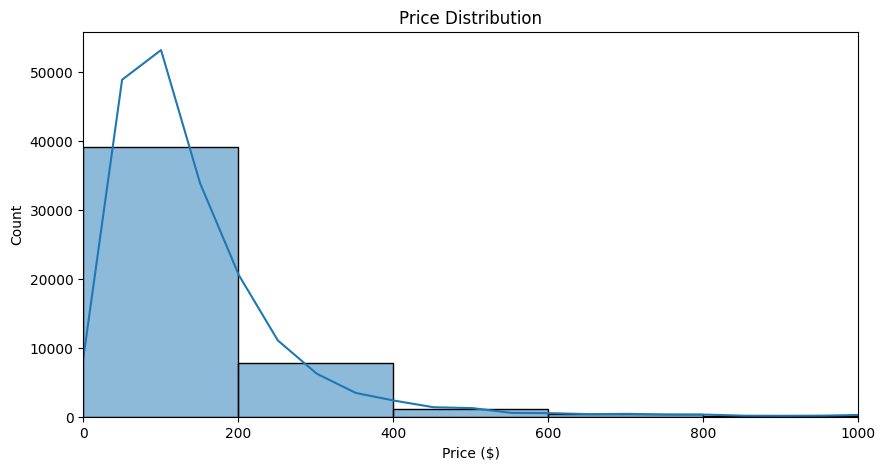

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.xlim(0, 1000)

Text(0.5, 1.0, 'Log-Scaled Price Distribution')

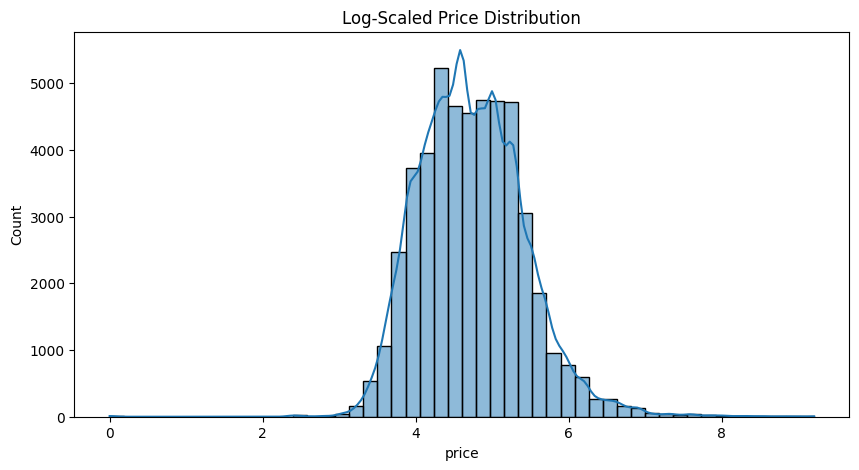

In [13]:
import numpy as np
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title("Log-Scaled Price Distribution")


Text(0.5, 1.0, 'Average Price by Borough')

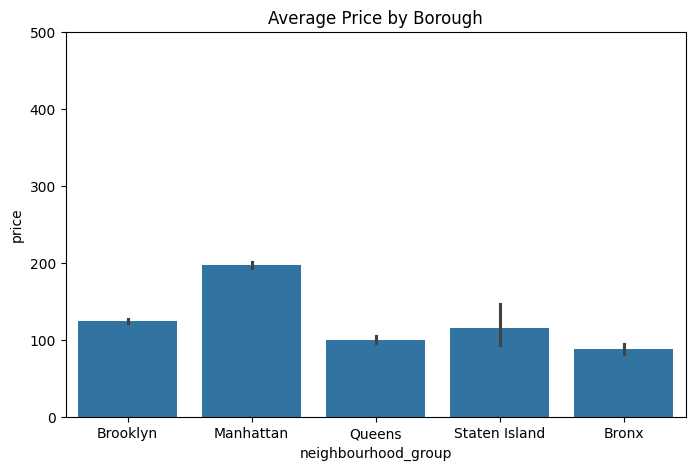

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.ylim(0,500)
plt.title("Average Price by Borough")

In [15]:
import plotly.express as px

fig = px.scatter_mapbox(
    df.sample(5000),
    lat='latitude', lon='longitude',
    color='price', size='price',
    hover_data=['neighbourhood','room_type'],
    mapbox_style='carto-positron', zoom=10
)
fig.update_layout(title_text="NYC Airbnb Listings (Price Map)")
fig.show()

Text(0.5, 1.0, 'Price vs. Number of Reviews')

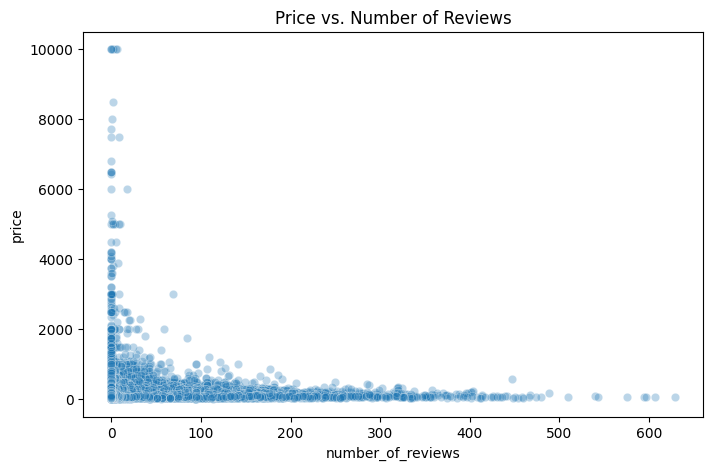

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.3)
plt.title("Price vs. Number of Reviews")

Text(0.5, 1.0, 'Correlation Matrix')

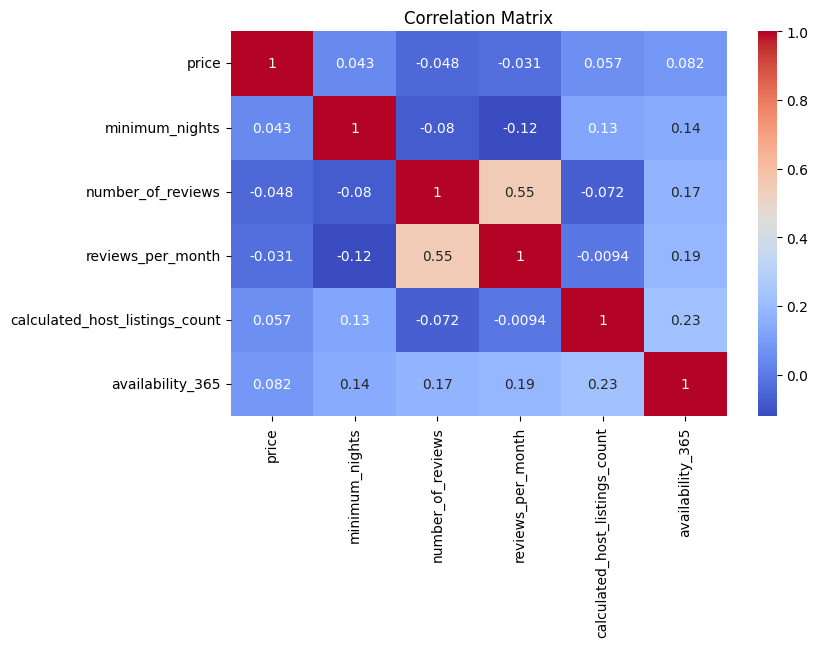

In [17]:
plt.figure(figsize=(8,5))
corr = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Proportion of Listings by Borough')

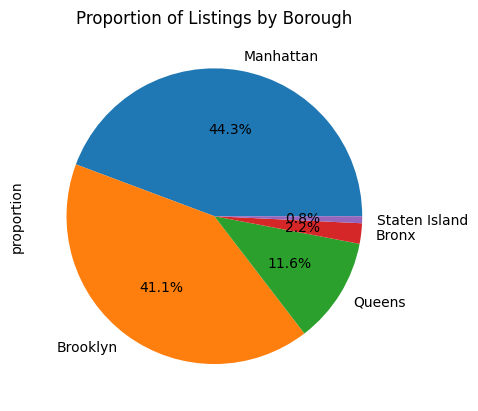

In [18]:
df['neighbourhood_group'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of Listings by Borough")

In [19]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [20]:
df = df.drop('last_review', axis=1)

In [21]:
# Dropping 'host_name' not only because it is insignificant but also for ethical reasons
df = df.drop('host_name', axis=1)

In [22]:
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [23]:
df.drop_duplicates()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [24]:
new_df = df[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews',	'reviews_per_month',	'calculated_host_listings_count']]
new_df.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,Brooklyn,Private room,149,1,6,365,9,0.21,6
1,Manhattan,Entire home/apt,225,1,2,355,45,0.38,2
2,Manhattan,Private room,150,3,1,365,0,0.00,1
3,Brooklyn,Entire home/apt,89,1,1,194,270,4.64,1
4,Manhattan,Entire home/apt,80,10,1,0,9,0.10,1


In [25]:
new_df = df[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews', 'reviews_per_month']]
new_df = pd.get_dummies(new_df, columns=['neighbourhood_group', 'room_type'], drop_first=False, dtype=int)
new_df.head()

,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews,reviews_per_month,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,6,365,9,0.21,0,1,0,0,0,0,1,0
1,225,1,2,355,45,0.38,0,0,1,0,0,1,0,0
2,150,3,1,365,0,0.00,0,0,1,0,0,0,1,0
3,89,1,1,194,270,4.64,0,1,0,0,0,1,0,0
4,80,10,1,0,9,0.10,0,0,1,0,0,1,0,0


### Linear Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = new_df.drop('price', axis=1)
y = y = np.log1p(new_df["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 0.25
Root Mean Squared Error (RMSE): 0.50
R-squared (R2): 0.48


In [27]:
# Train vs Test mterics for LR
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Linear Regression Performance")
print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")


Linear Regression Performance
Train -> MAE: 0.37, RMSE: 0.51, R2: 0.47
Test  -> MAE: 0.36, RMSE: 0.50, R2: 0.48


### Random Forest

In [35]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators= 200, min_samples_split = 2, min_samples_leaf = 5, max_features= 'sqrt', max_depth= 14)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)

mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R2): {r2_rf:.2f}")

Random Forest - Mean Absolute Error (MAE): 0.34
Random Forest - Mean Squared Error (MSE): 0.21
Random Forest - Root Mean Squared Error (RMSE): 0.46
Random Forest - R-squared (R2): 0.55


In [36]:
# Train vs Test metrics for RF
y_train_pred_rf = rf_model.predict(X_train_rf)
y_test_pred_rf = rf_model.predict(X_test_rf)

mae_train = mean_absolute_error(y_train_rf, y_train_pred_rf)
rmse_train = np.sqrt(mean_squared_error(y_train_rf, y_train_pred_rf))
r2_train = r2_score(y_train_rf, y_train_pred_rf)

mae_test = mean_absolute_error(y_test_rf, y_test_pred_rf)
rmse_test = np.sqrt(mean_squared_error(y_test_rf, y_test_pred_rf))
r2_test = r2_score(y_test_rf, y_test_pred_rf)

print("Random Forest Performance")
print(f"Train -> MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")
print(f"Test  -> MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")


Random Forest Performance
Train -> MAE: 0.32, RMSE: 0.45, R2: 0.59
Test  -> MAE: 0.34, RMSE: 0.46, R2: 0.55


In [32]:
# Fine tuning

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [200, 300, 500],
    "max_depth": [6, 10, 14, None],
    "min_samples_leaf": [1, 5, 10, 20],
    "min_samples_split": [2, 10, 20],
    "max_features": ["sqrt", 0.5, 0.7]
}

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring="r2",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [6, 10, 14, None],
                                        'max_features': ['sqrt', 0.5, 0.7],
                                        'min_samples_leaf': [1, 5, 10, 20],
                                        'min_samples_split': [2, 10, 20],
                                        'n_estimators': [200, 300, 500]},
                   random_state=42, scoring='r2', verbose=2)

In [33]:
best_rf = search.best_estimator_
print("Best params:", search.best_params_)


Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 14}
